Inserisci numero di fotogrammi:
20
Immagine di taratura:


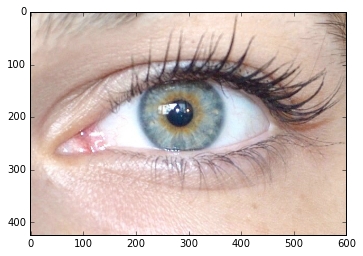

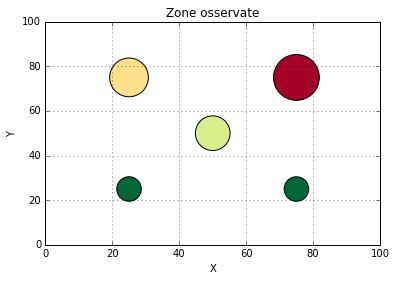

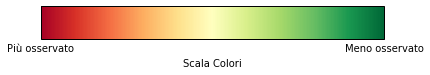

In [3]:
%matplotlib inline
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mplimg

#Considero solo il rettangolo occhio e incremento contatore (solo se supero soglia bianco) 
#0_alto,1_basso,2_sinistra,3_destra 
def conta_punti(img,count):
    global y_centro, x_centro,soglia,xL,xH,yL,yH
    for y in range(yL,yH):
        for x in range(xL,xH):
            if img[y,x]>soglia:
                if y<y_centro:
                    count[0] +=1
                else:
                    count[1] +=1 
    for y in range(yL,yH):
        for x in range(xL,xH):
            if img[y,x]>soglia:
                if x<x_centro:
                    count[2] +=1
                else:
                    count[3] +=1            
    return count  

#Creo punti x e y considerando i cinque possibili blocchi in base ai contatori
def assegnamento(count,COUNT_tar):
    
    if ((count[0] > (COUNT_tar[0]-800)) and (count[0] < (COUNT_tar[0]+800)) and 
        (count[1] > (COUNT_tar[1]-800)) and (count[1] < (COUNT_tar[1]+800)) and 
        (count[2] > (COUNT_tar[2]-800)) and (count[2] < (COUNT_tar[2]+800)) and
        (count[3] > (COUNT_tar[3]-800)) and (count[3] < (COUNT_tar[3]+800))):
        x=50
        y=50
    elif (count[0] > count[1]) and (count[2]>count[3]):
        y=25
        x=25
    elif (count[0] > count[1]) and (count[2]<count[3]):
        y=25
        x=75
    elif (count[0] < count[1]) and (count[2]>count[3]):
        y=75
        x=25
    else:
        y=75
        x=75
    return(x,y)     

#Incremento quattro contatori ALTO(0),BASSO(1),SINISTRA(2),DESTRA(3) in base ai punti 
#x,y per ognuna delle N immagini.
#Esempio:
#lista=[[50,50],[75,25],[50,75],...] N sottoliste
#lista[0][0]=50
#lista[2][1]=75
#etc.
def conta_posix(lista,count):
    for i in range(N):
            if lista[i][0]== 50 and lista[i][1] ==50:
                count[0] +=1
            elif lista[i][0]== 25 and lista[i][1] ==25:
                count[1] +=1
            elif lista[i][0]== 25 and lista[i][1] ==75:
                count[2]+=1
            elif lista[i][0]== 75 and lista[i][1] ==25:
                count[3]+=1
            else: 
                count[4]+=1

#Questa funzione ci dà il numero di pixels bianchi esterni al rettangolo che 
#scelgo come occhio.
def taratura_soglia(img_tar, count):
    for y in range(yL):
        for x in range(xH):
            if img_tar[y,x]>180:
                count[0]+=1
    for y in range(yH,Col):
        for x in range(xH):
            if img_tar[y,x]>180:
                count[1]+=1
    for y in range(yL,yH):
        for x in range(xL):
            if img_tar[y,x]>180:
                count[2]+=1              
    return count[0]+count[1]+count[2]

print("Inserisci numero di fotogrammi:")
N=int(input())

#Creo una lista con tutte le immagini a/b/c
immagini=[]
for i in range(N):
    immagini.append(cv2.imread('imgc%s.jpg'%i,0))

#Creo un'immagine di taratura img0
img_tar=cv2.imread('imgc0.jpg',0)

#Definisco righe e colonne dell'immagine considerando img0
#1: le righe sono le x (larghezza)
#0: le colonne sono le y (altezza)
Row=img_tar.shape[1]
Col=img_tar.shape[0]

#Definisco le coordinate del centro dell'immagine
x_centro=int(Row/2)
y_centro=int(Col/2)
yL=int(0.25*Col)
yH=int(0.7*Col)
xL=int(Row/6)
xH=Row

#Taratura valore bianco

count_soglia=[0,0,0,0]
#val_soglia mi dà il numero di punti bianchi fuori dall'occhio
val_soglia=taratura_soglia(img_tar,count_soglia)

#Ottengo pixels esterni
pixels_ext=(Row*Col)-(200*500)

#Decido quale soglia utilizzare
if val_soglia>(pixels_ext*0.7):
    soglia=200
else:
    soglia=180

#Fine taratura valore bianco

#Taratura soglie centro

#conta_punti: considero solo il rettangolo occhio e incremento contatore 
#(solo se supero soglia bianco) 
#0_alto,1_basso,2_sinistra,3_destra 
#Creo così COUNT_tar per capire qual è il valore di ognuno dei contatori 
#per la mia immagine di taratura (CENTRO).
COUNT_tar=[0]*4
COUNT_tar=conta_punti(img_tar,COUNT_tar)

#Fine taratura soglie centro

#Creo una lista che contiene N sottoliste: [[0,0,0,0],[0,0,0,0],...]
COUNT=[]
for i in range(N):
    COUNT.append([0]*4)

#Per ognuna delle immagini N applico conta_punti a COUNT, quindi ottendo una lista 
#con N sottoliste
#in ognuna delle quali ci sono i valori dei quattro contatori: 
#[[11,5,4,0],[10,0,6,4],...]
for i in range(N):
    COUNT[i]=conta_punti(immagini[i],COUNT[i])

#Creo una lista con N sottoliste in cui inserisco le coordinate x,y del punto:
#[(50,50),(25,75),...]
punti=[]
for i in range(N):
    punti.append(assegnamento(COUNT[i], COUNT_tar))

#[(50,50),(25,25),...] sono tutte le possibili posizioni che possono essere 
#assunte dai punti nello scatterplot
X_VAL=[50,25,25,75,75]
Y_VAL=[50,25,75,25,75]

#Incremento quattro contatori ALTO(0),BASSO(1),SINISTRA(2),DESTRA(3) in base 
#ai punti x,y per ognuna delle N immagini.
#Esempio:
#lista=[[50,50],[75,25],[50,75],...] N sottoliste
#lista[0][0]=50
#lista[2][1]=75
#etc.
#POSIX è il count, una lista con cinque numeri che indicano ognuno dei cinque 
#contatori: [3,6,1,10] .
#punti è la lista 
POSIX=[0]*5
conta_posix(punti,POSIX)

colori=[]
min_POSIX=min(POSIX)
POSIX_tmp=[]
#creo POSIX_tmp considerando ogni elemento di POSIX e sottraendogli il suo minimo.
#Così creo il massimo di POSIX_tmp che, se è 0, ci dice che ho guardato allo 
#stesso modo in tutti i punti.
#Quindi coloro tutti i punti allo stesso modo.
#Altrimenti: metto in colori POSIX_tmp diviso il suo massimo per ogni elemento 
#di POSIX_tmp, facendo poi
#1-questa divisione: sto specchiando il colore considerando che abbiamo 
#acquisito le foto di fronte al soggetto.
#Inoltre sto associando un valore pari a 0 (rosso) al contatore maggiore, 
#un valore pari a 1 (verde) al minore.
#Es. di prima:
#POSIX_tmp=[2,5,0,9]
#max_POSIX_tmp=(9)
#POSIX_tmp[i]/max_POSIX_tmp=[2/9,5/9,0,1]
#1-...=[7/9,4/9,1,0]
for i in range(len(POSIX)):
    POSIX_tmp.append(POSIX[i]-min_POSIX)
max_POSIX_tmp=max(POSIX_tmp)
if (max_POSIX_tmp)==0:
    for i in range(len(POSIX_tmp)):
        colori.append(1)
else:
    for i in range(len(POSIX_tmp)):
        colori.append(1-(POSIX_tmp[i]/max_POSIX_tmp))

#Creo una lista con quattro elementi, che rappresentano un'area proporzionale 
#alla grandezza del contatore considerato.
area=[]
for i in range (len(POSIX)):
    area.append(POSIX[i]*300)
    
#Mostro a video l'immagine di taratura
print("Immagine di taratura:")
img = mplimg.imread('imgc0.jpg')
imgplot = plt.imshow(img)
plt.show()

#Considero tutti i punti possibili, con area e colori creati prima.
#cmap serve a inserire la scala di colori dal rosso al verde.
#colors fa sì che si usi la scala (0 rosso, 1 verde) considerando i valori di 
#colori inseriti prima.
#1 al contatore minore -> verde
#0 al contatore maggiore -> rosso
#visualizzo lo scatterplot
cmap = plt.get_cmap('RdYlGn')
colors = [cmap(i) for i in colori]       
plt.scatter(X_VAL, Y_VAL, s=area, c=colors)
plt.axis([0,100,0,100])
plt.grid(True)
plt.title("Zone osservate")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#visualizzo la legenda
fig=plt.figure(figsize=(5.3,3))
ax1=fig.add_axes([0.05,0.80,0.9,0.15])
cmap_colorbar=mpl.cm.RdYlGn
cbl=mpl.colorbar.ColorbarBase(ax1, cmap=cmap_colorbar, orientation='horizontal',ticks=[0,1])
cbl.set_label('Scala Colori')
cbl.ax.set_xticklabels(['Più osservato','Meno osservato'])
plt.show()